In [1]:
#importing all the required modules
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
from sklearn.metrics import classification_report

In [2]:
#Loading the data as an array of images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
len(x_train), len(y_test)

11501568/11490434 [==============================] - 0s 0us/step


(60000, 10000)

In [3]:
#Visualizing the pixel values to approximately get the shape of the digit in the image
pd.DataFrame(x_train[34])
#for example the below image resembles zero

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,255,253,253,253,124,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180,253,251,251,251,251,145,62,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,32,217,241,253,251,251,251,251,253,107,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,37,251,251,253,251,251,251,251,253,107,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,166,251,251,253,251,96,148,251,253,107,0,0,0,0,0,0


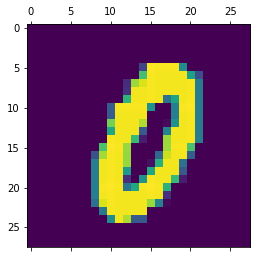

In [4]:
#Plotting the digit
plt.matshow(x_train[34])

In [5]:
#reshaping the data as required by the input function of the model

x_train_with_chanels = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_test_with_chanels = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
#Visualizing the array dimensions in which these images are stored
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [7]:
#normalizing the pixel values from 0.0 to 1.0
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [8]:
#forming the CNN model

model= tf.keras.models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = 3, strides = (1,1) ,padding = 'same', activation='relu', input_shape = (28,28,1)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(filters = 64, kernel_size = 3, strides = (1,1) ,padding = 'same', activation='relu'),
    layers.MaxPool2D(pool_size= (2,2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(filters = 64, kernel_size = 3, strides = (1,1) ,padding = 'same', activation='relu'),
    layers.MaxPool2D(pool_size= (2,2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(filters = 128, kernel_size = 3, strides = (1,1) ,padding = 'same', activation='relu'),
    layers.MaxPool2D(pool_size= (2,2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.2),

    layers.Dense(256, activation= 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Dense(128, activation= 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Dense(10, activation='softmax')
])

In [12]:
#Summary of parameters of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

In [9]:
#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [11]:
#training the model
training_history = model.fit(x_train_normalized, y_train, epochs=10,
          validation_data=(x_test_normalized, y_test),
          callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.0198 - val_accuracy: 0.9940
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0204 - val_accuracy: 0.9931
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0173 - val_accuracy: 0.9940
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0161 - val_accuracy: 0.9948
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0173 - val_accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0177 - val_accuracy: 0.9948
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0264 - accuracy: 0.9921 - val_loss: 0.0183 -

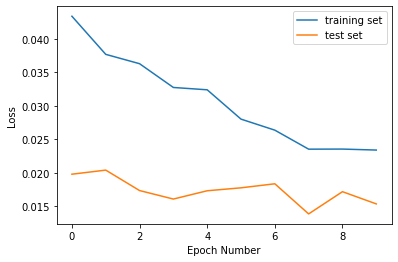

In [13]:
#plotting the number of epochs vs loss values
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

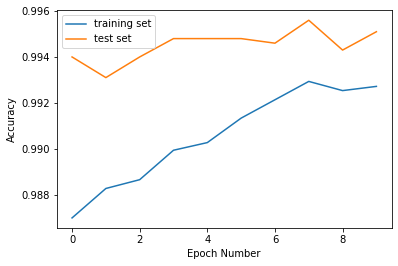

In [14]:
#plotting the number of epochs vs accuracy values
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [15]:
#evaluating the model performance against the test dataset

model.evaluate(x_test_normalized, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0153 - accuracy: 0.9951


[0.015334030613303185, 0.9951000213623047]

Text(69.0, 0.5, 'Truth')

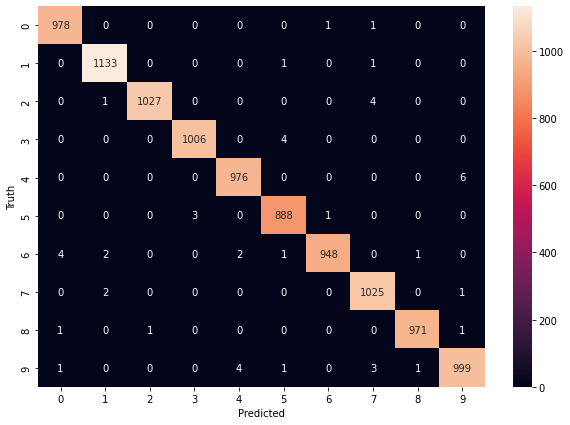

In [16]:
#Plotting the confusion matrix for this dataset

y_predicted = model.predict(x_test_normalized)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
#calculating various parameters abd printing the classification report
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [18]:
#predicting the classified image with the model
#here image[50] is predicted as number 6
np.argmax(y_predicted[50])

6

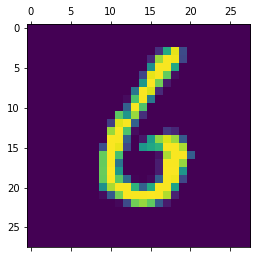

In [19]:
#the model prediction is correct 
plt.matshow(x_test[50])

In [20]:
#predicting the classified image with the model
#here image[99] is predicted as number 9
np.argmax(y_predicted[99])

9

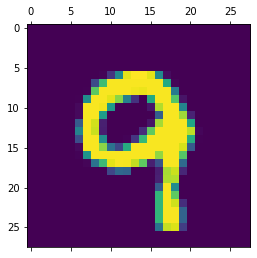

In [21]:
#the model prediction is correct 
plt.matshow(x_test[99])